In [0]:
# google colab特殊設計，可以用tensorflow 哪一個版本, 用 2.x 版本
%tensorflow_version 2.x

In [0]:
#ML深度學習神經網路
from tensorflow.keras.datasets.mnist import load_data
# tuple裡面長這個樣子 ((x_train, y_train), (x_test, y_test))
((x_train, y_train), (x_test, y_test)) = load_data()

In [15]:
# 看一下資料有幾筆，x_train有 60000張圖片, 每一張都是 28 x 28的圖片, 訓練的時候圖片每一張大小都要一樣, 不一樣就縮放圖片
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [16]:
#取一筆資料查看, 0代表黑色，有數字的代表有顏色
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


這個是: 2


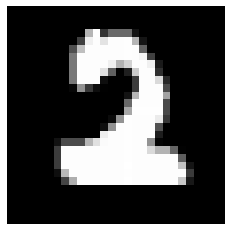

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
p = random.randint(0, 59999)
plt.axis("off")
print("這個是:", y_train[p])
plt.imshow(x_train[p], cmap="gray")

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
#dense_1 784 x 64 + 64(bias, bias也是按照隨機梯度下降調整到最好的值)
model.add(Dense(64, activation="relu", input_dim=784))
#dense_2 為什麼是650個param, 64 x 10 +10(bias, 做為偏移資料使每一個激活函式統一規格用)
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [20]:
#資料預處理, 攤開成為1D-> /255, normalize成為 0-1, 
#因為隨機的東西是 w, 要把深度學習的輸出調整成0-1是因為 tensorflow, keras 預期參數要在0-1區機內才不會差太多
#以前的函式 coffe 專門處理圖片, 就不用normalize，但在用 tensorflow一定要normalize 
# 可以把一個位子填成 -1, 表示讓程式自己計算 x_train.reshape(-1, 784)
x_train_norm = x_train.reshape(-1, 784)/ 255
x_test_norm = x_test.reshape(10000, 784)/ 255
x_train_norm[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [21]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("原本:", y_train[2])
print("預測:", y_train_cat[2])

原本: 4
預測: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [22]:
# batch_size :看多少筆資料做一次梯度下降, 如果圖片不大, 約100-200左右, 圖片大, 約10-20
# validation_split: 切出一部分做為驗證資料
# epochs: 整份資料集看多少遍
# verbos: 有預設值, 0=安靜模式, 1=有進度條, 2=普通
# 看模型訓練的好不好看 val_loss有沒有收斂值差不多就可以停下來, 太多是過擬合, 不要看 val_accuracy,鑑別度較低
model.fit(x_train_norm, y_train_cat,
          batch_size=200,
          validation_split=0.1,
          epochs=16,
          verbose=1)

Epoch 1/16
270/270 [==============================] - 1s 3ms/step - loss: 0.5237 - accuracy: 0.8578 - val_loss: 0.2324 - val_accuracy: 0.9373
Epoch 2/16
270/270 [==============================] - 1s 3ms/step - loss: 0.2508 - accuracy: 0.9299 - val_loss: 0.1753 - val_accuracy: 0.9540
Epoch 3/16
270/270 [==============================] - 1s 3ms/step - loss: 0.1988 - accuracy: 0.9443 - val_loss: 0.1505 - val_accuracy: 0.9597
Epoch 4/16
270/270 [==============================] - 1s 3ms/step - loss: 0.1654 - accuracy: 0.9535 - val_loss: 0.1327 - val_accuracy: 0.9627
Epoch 5/16
270/270 [==============================] - 1s 3ms/step - loss: 0.1412 - accuracy: 0.9600 - val_loss: 0.1198 - val_accuracy: 0.9657
Epoch 6/16
270/270 [==============================] - 1s 3ms/step - loss: 0.1226 - accuracy: 0.9655 - val_loss: 0.1099 - val_accuracy: 0.9695
Epoch 7/16
270/270 [==============================] - 1s 3ms/step - loss: 0.1083 - accuracy: 0.9695 - val_loss: 0.1075 - val_accuracy: 0.9688
Epoch 

In [23]:
# 只要在 tensorflow 裏面, 代入 one-hot encoding後的答案
# 測試後 256 層效果比較好
model.evaluate(x_test_norm, y_test_cat, verbose=2)

313/313 - 1s - loss: 0.0901 - accuracy: 0.9738


[0.09008583426475525, 0.973800003528595]

In [24]:
# peridict: 給機率, predict_classes: 給類別
pre = model.predict_classes(x_test_norm)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [25]:
#分析哪些東西比較容易混淆, 不是在tensorflow裏面, 要用非noermalize之前的數據
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pre)
c = ["{}(預測)".format(i) for i in range(10)]
i = ["{}(真實)".format(i) for i in range(10)]
pd.DataFrame(mat, columns=c, index=i)

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(真實),970,0,0,3,1,3,1,1,1,0
1(真實),0,1123,3,1,0,1,3,1,3,0
2(真實),4,2,1006,3,3,1,2,5,5,1
3(真實),0,0,1,991,0,4,2,5,4,3
4(真實),2,0,5,1,959,0,4,2,1,8
5(真實),2,1,0,6,2,866,7,3,4,1
6(真實),5,3,2,1,3,8,931,1,4,0
7(真實),1,4,9,4,1,1,0,1002,0,6
8(真實),6,0,4,11,8,8,2,8,922,5
9(真實),5,4,1,7,10,3,0,8,3,968


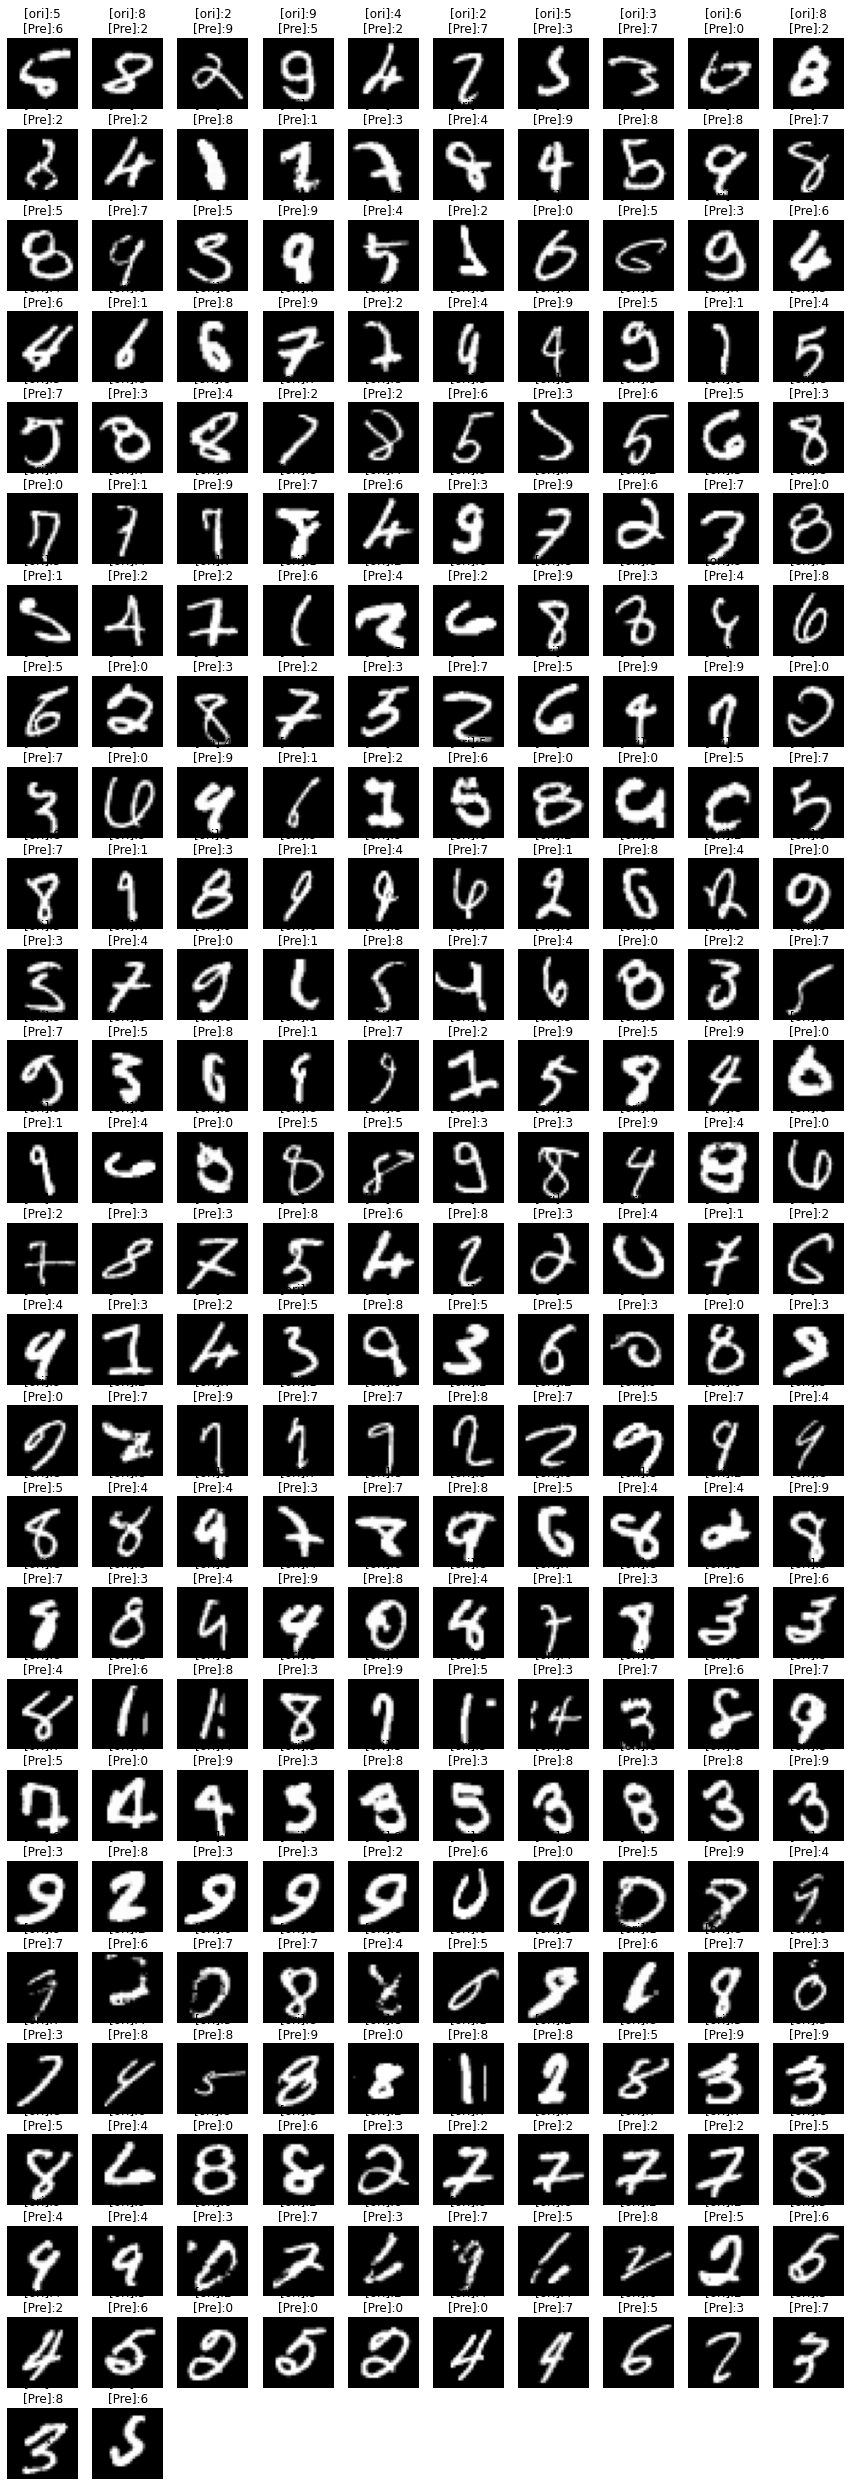

In [26]:
# subplot(總高度,  總寬度, 幾張圖)
# np nonzero:找到預測錯誤東西的index, 是一個tuple 拿出來是 (x座標, y座標, z座標), 這邊只有x座標, 所以用[0]拿出座標
import numpy as np
idx = np.nonzero(pre != y_test)[0]
# 預測錯誤的圖
false_img = x_test[idx]
false_answer = y_test[idx]
false_predict = pre[idx]
#把圖變大
plt.figure(figsize=(15, 45))
width = 10
height = len(false_img) // width +1
for i, img in enumerate(false_img):
  plt.subplot(height, width, i+1)
  plt.axis("off")
  t = "[ori]:{}\n[Pre]:{}".format(false_answer[i], 
                                  false_predict[i])
  plt.title(t)
  plt.imshow(img, cmap="gray")

In [0]:
#驗證一下 做個app, 用小畫家做出一個圖給他預測
from tensorflow.keras.preprocessing.image import load_img
fn = input("輸入檔名:")
img = load_img(fn, target_size=(28, 28)).convert("L")
#剛剛帶入時是 (10000, 784), 現在帶入(1, 784)
img_norm = np.arry(img).reshape(-1, 784) / 255
model.predict_classes(img_norm)[0]
print("應該是:", ans)
plt.imshow(img, cmap="gray")

In [0]:
# MLP看像素：先把像素整個攤開成為1D, 然後 預測像素-真實像素 看兩者差多少
# CNN：不管甚麼類型的CNN 都是 做一個特徵的抓取(CNN), 再丟到MLP(腦袋), 所謂的CNN就是做特徵抓取, 再把這些特徵丟到MLP